# Introduction to AI: assignment 2

## A. Reading and visualizing the advertising data set

In this part you are going to use the data set contained in the file
Advertising.csv1
. In this data set, the sales of a product, in thousands of units, for 200 different markets are given. For each market, it is
also given the budget, in thousands of dollars, spent in advertising
in 3 different media: TV, radio and newspaper. The objective is to
find an adequate prediction model linking the explanatory variables,
i.e. advertising spending on each medium, with the output variable,
the sales. In order to achieve this objective, we are going to test and
compare different linear regression approaches.


Reading data from csv file

To read the csv file Advertising.csv, you can use a library called
pandas. Import the library with

import pandas as pd 

Read the csv file and store its content in a data frame with the command read_csv from pandas:
df = pd.read_csv("path_to_the_file") 

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/Labwork_2/Advertising.csv')

Show what is inside the data frame

In [ ]:
print(df)

     Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


Drop unnamed column

If the data frame contain an extra unnamed column, remove it with
the command drop from pandas:
df.drop(df.columns[0] , axis =1)

In [ ]:
df = df.drop(df.columns[0], axis=1)
print(df)

        TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


Import numpy, generate feature matrix $\mathbf{X}$ and generate output array $\mathbf{y}$ 

In [ ]:
import numpy as np
 
X = df[['TV', 'radio', 'newspaper']]
X = X.to_numpy()
y = df[['sales']]
y = y.to_numpy()


Print first row to check

In [ ]:
head, *tail = X
print(head)
head, *tail = y
print(head)


[230.1  37.8  69.2]
[22.1]


Scatter plots for $\mathbf{y}$ againts each considered feature  

Import pyplot from matplotlib and generate separate scatter plots of
y against each feature.

Sales *vs*. TV

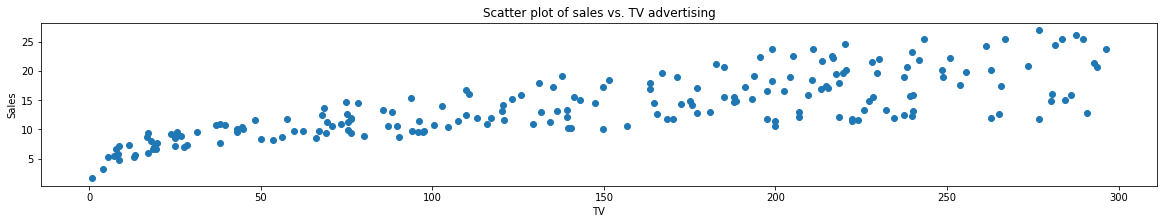

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,3)
plt.scatter(X[:,0],y);
plt.title("Scatter plot of sales vs. TV advertising");
plt.xlabel("TV");
plt.ylabel("Sales");

Sales *vs*. Radio

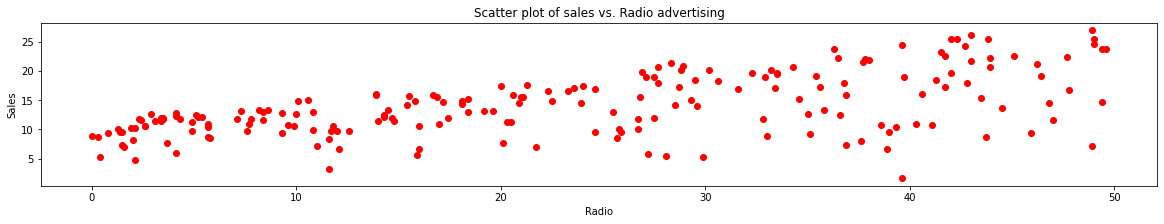

In [ ]:
plt.rcParams["figure.figsize"] = (20,3)
plt.scatter(X[:,1],y, c='r');
plt.title("Scatter plot of sales vs. Radio advertising");
plt.xlabel("Radio");
plt.ylabel("Sales");

Sales *vs*. Newspaper

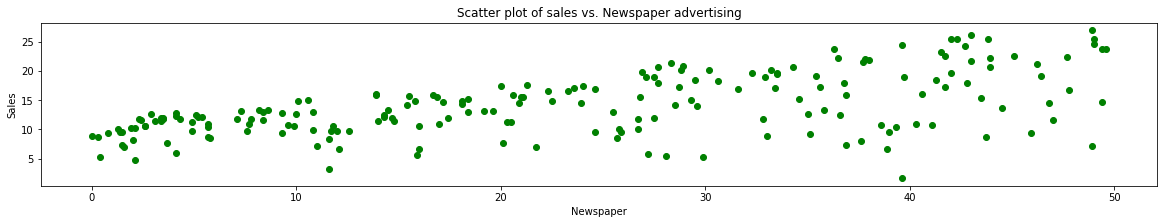

In [ ]:
plt.rcParams["figure.figsize"] = (20,3)
plt.scatter(X[:,1],y, c='g');
plt.title("Scatter plot of sales vs. Newspaper advertising");
plt.xlabel("Newspaper");
plt.ylabel("Sales");

Plotting the 3 scatter plots at once in a subplot

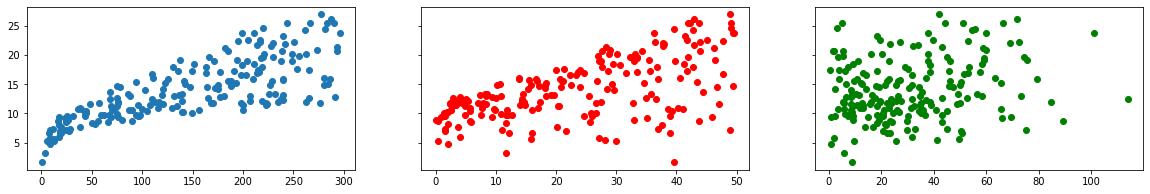

In [ ]:
plt.rcParams["figure.figsize"] = (20,3)
fig, axs = plt.subplots(1,3, sharey=True)
axs[0].scatter(X[:,0],y)
axs[1].scatter(X[:,1],y,c='r')
axs[2].scatter(X[:,2],y, c='g')

## B. Simple linear regression

Import linear regression functions from Scikit-learn

In [ ]:
from sklearn import linear_model as lm ,metrics as met

Linear regression for TV spending

beta_0 = 7.032593549127695, beta_1 = 0.04753664043301975
MSE =  10.512652915656757
RMSE =  3.2423221486546887
R^2 =  0.611875050850071


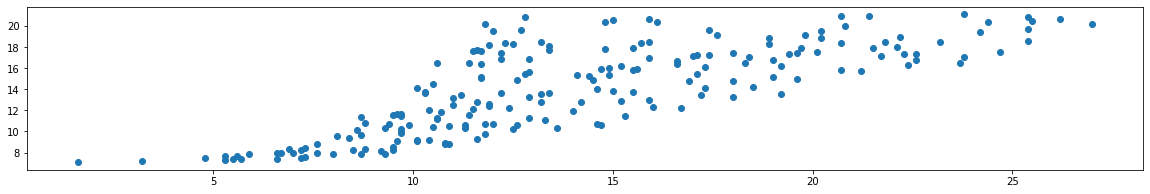

In [ ]:
# Define the linear regressor object
linreg_1 = lm.LinearRegression()
x_1 = X[:,[0]]

# Train the linear regressor

linreg_1.fit(x_1,y)
# Use the regressor to predict the regression segment. 
yhat = linreg_1.predict(x_1)
# Calculate the MSE, RMSE, R^2
MSE_1 = met.mean_squared_error(y,yhat)
RMSE_1 = np.sqrt(MSE_1)
R_2_1 = met.r2_score(y, linreg_1.predict(x_1))

# Print the quantities you calculated

print('beta_0 = {}, beta_1 = {}'.format(linreg_1.intercept_[0],
                                        linreg_1.coef_[0,0]))
print('MSE = ',MSE_1)
print('RMSE = ',RMSE_1)
print('R^2 = ',R_2_1)


#  What are the x-extrema of the segment?

# Scatter plot the data and the prediction line

plt.scatter(y, yhat);

Linear regression for radio spending

beta_0 = 9.311638095158283, beta_1 = 0.20249578339243965
MSE =  18.09239774512544
RMSE =  4.2535159274564185
R^2 =  0.33203245544529525


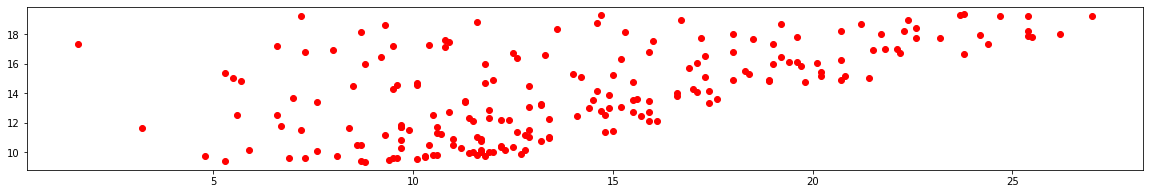

In [ ]:
linreg_2 = lm.LinearRegression()
x_2 = X[:,[1]]
linreg_2.fit(x_2,y)
yhat = linreg_2.predict(x_2)
#Print the quantities you calculated
MSE_2 = met.mean_squared_error(y, yhat)
RMSE_2 = np.sqrt(MSE_2)
R_2_2 = met.r2_score(y, yhat)
print('beta_0 = {}, beta_1 = {}'.format(linreg_2.intercept_[0],
                                        linreg_2.coef_[0,0]))
print('MSE = ',MSE_2)
print('RMSE = ',RMSE_2)
print('R^2 = ',R_2_2)
plt.scatter(y,yhat , c='r');

Linear regression for newspaper spending

beta_0 = 12.35140706927816, beta_1 = 0.05469309847227336
MSE =  25.674022720559698
RMSE =  5.066953988399707
R^2 =  0.05212044544430516


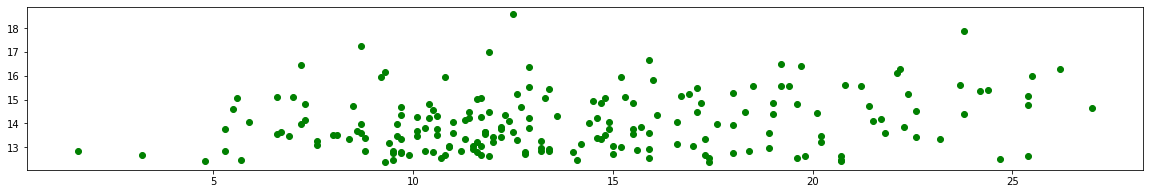

In [ ]:
linreg_3 = lm.LinearRegression()
x_3 = X[:,[2]]
linreg_3.fit(x_3,y)
yhat = linreg_3.predict(x_3)
#Print the quantities you calculated
MSE_3 = met.mean_squared_error(y, yhat)
RMSE_3 = np.sqrt(MSE_3)
R_2_3 = met.r2_score(y, yhat)
print('beta_0 = {}, beta_1 = {}'.format(linreg_3.intercept_[0],
                                        linreg_3.coef_[0,0]))
print('MSE = ',MSE_3)
print('RMSE = ',RMSE_3)
print('R^2 = ',R_2_3)
plt.scatter(y,yhat , c='g');

## C. Multiple linear regression with 2 or 3 explanatory variables

Linear regression for TV and radio spendings

In [ ]:
M1=df[['TV','radio']]
linreg_M1 = lm.LinearRegression() 
linreg_M1.fit(M1, y)
yhat = linreg_M1.predict(M1)
MSE_M1 = met.mean_squared_error(y, yhat)
RMSE_M1=np.sqrt(MSE_M1)
R2_M1=met.r2_score(y, yhat)
print('beta_0:',linreg_M1.intercept_,',beta_1M1 beta_2M1 :',linreg_M1.coef_)

print('MSE_M1 :',MSE_M1)
print('RMSE_M1:',RMSE_M1)
print('R2_M1 :',R2_M1)

beta_0: [2.92109991] ,beta_1M1 beta_2M1 : [[0.04575482 0.18799423]]
MSE_M1 : 2.784569900338091
RMSE_M1: 1.6687030593661927
R2_M1 : 0.8971942610828957


Linear regression for TV and newspaper spendings

In [ ]:
M2=df[['TV','newspaper']]
linreg_M2 = lm. LinearRegression () 
linreg_M2.fit(M2, y)
yhat = linreg_M2.predict(M2)
MSE_M2 = met.mean_squared_error(y, yhat)
RMSE_M2=np.sqrt(MSE_M2)
R2_M2=met.r2_score(y, yhat)
print('beta_0M2:',linreg_M2.intercept_,',beta_1M2 beta_2M2 :',linreg_M2.coef_)

print('MSE_M2 :',MSE_M2)
print('RMSE_M2:',RMSE_M2)
print('R2_M2 :',R2_M2)

beta_0M2: [5.77494797] ,beta_1M2 beta_2M2 : [[0.04690121 0.04421942]]
MSE_M2 : 9.59280905948414
RMSE_M2: 3.097226026541192
R2_M2 : 0.6458354938293271


Linear regression for radio and newspaper spendings

In [ ]:
M3=df[['radio','newspaper']]
linreg_M3 = lm. LinearRegression () 
linreg_M3.fit(M3, y)
yhat = linreg_M3.predict(M3)
MSE_M3 = met.mean_squared_error(y, yhat)
RMSE_M3=np.sqrt(MSE_M3)
R2_M3=met.r2_score(y, yhat)
print('beta_0M3:',linreg_M3.intercept_,',beta_1M3 beta_2M3 :',linreg_M3.coef_)
print('MSE_M3 :',MSE_M3)
print('RMSE_M3:',RMSE_M3)
print('R2_M3 :',R2_M3)

beta_0M3: [9.18892046] ,beta_1M3 beta_2M3 : [[0.19904459 0.00664417]]
MSE_M3 : 18.074176393224953
RMSE_M3: 4.251373471388388
R2_M3 : 0.33270518395032256


Linear regression for TV, radio and newspaper spendings

In [ ]:
M4=df[['TV','radio','newspaper']]
linreg_M4 = lm. LinearRegression () 
linreg_M4.fit(M4, y)
yhat =  linreg_M4.predict(M4)
MSE_M4 = met.mean_squared_error(y,yhat)
RMSE_M4=np.sqrt(MSE_M4)
R2_M4=met.r2_score(y,yhat)
print('beta_0M4:',linreg_M4.intercept_,',beta_1M4 beta_2M4 :',linreg_M4.coef_)

print('MSE_M4 :',MSE_M4)
print('RMSE_M4:',RMSE_M4)
print('R2_M4 :',R2_M4)

beta_0M4: [2.93888937] ,beta_1M4 beta_2M4 : [[ 0.04576465  0.18853002 -0.00103749]]
MSE_M4 : 2.784126314510936
RMSE_M4: 1.6685701407225697
R2_M4 : 0.8972106381789522
